# Лабораторна робота 7
### Тимахова Ксенія КН-423а

In [2]:
N = ord("T") % 3 + 1
print(f"Варіант: {N}")

Варіант: 1


In [4]:
#!/bin/bash
!kaggle datasets download piterfm/2022-ukraine-russian-war -p .

Dataset URL: https://www.kaggle.com/datasets/piterfm/2022-ukraine-russian-war
License(s): CC-BY-NC-SA-4.0
  0%|                                               | 0.00/46.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 46.1k/46.1k [00:00<00:00, 54.8MB/s]


In [6]:
import zipfile

with zipfile.ZipFile('2022-ukraine-russian-war.zip', 'r') as zip_file:
    zip_file.extractall('lab7')

### Завдання
Варіант 1. Дослідження втрат польової артилерії (Field Artillery)
1. Знайдіть добові втрати польової артилерії.
2. Знайдіть 3 найбільші добові втрати польової артилерії і визначте дати.
3. Визначте, скільки польової артилерії було знищено влітку 2025 року.
4. Знайдіть середнє значення втрат артилерії за останні 300 днів війни.
5. Створіть графік втрат польової артилерії та танків за перший рік війни
(починаючи з першої дати в наборі даних)

Завантажено файл

In [14]:
import pandas as pd

df = pd.read_csv('lab7/russia_losses_equipment.csv')

*1. Відсортовано дані за датою для правильного обчислення добових втрат. Знайдено добові втрати польової артилерії за допомогою diff() та збережено у новому стовпці*

In [142]:
df = df.sort_values('date')
df['daily_losses_artillery'] = df['field artillery'].diff()
df[['date', 'daily_losses_artillery']]

,date,daily_losses_artillery
1360,2022-02-25,NaN
1359,2022-02-26,0.0
1358,2022-02-27,1.0
1357,2022-02-28,24.0
1356,2022-03-01,3.0
...,...,...
4,2025-11-12,13.0
3,2025-11-13,9.0
2,2025-11-14,35.0
1,2025-11-15,20.0


*2. Знайдено найбільші три добові втрати польової артилерії*

In [143]:
top3_daily_losses = df.nlargest(3, 'daily_losses_artillery')
top3_daily_losses[['date', 'daily_losses_artillery']] 

,date,daily_losses_artillery
233,2025-03-28,122.0
238,2025-03-23,104.0
240,2025-03-21,101.0


*3. Визначено скільки було знищено польової артилерії в літку 2025 року за функції loc*

In [144]:
df.loc[(df['date'] >= '2025-06-01') & (df['date'] <= '2025-08-31'), ['date', 'daily_losses_artillery']]

,date,daily_losses_artillery
168,2025-06-01,52.0
167,2025-06-02,48.0
166,2025-06-03,48.0
165,2025-06-04,88.0
164,2025-06-05,39.0
...,...,...
81,2025-08-27,45.0
80,2025-08-28,40.0
79,2025-08-29,61.0
78,2025-08-30,47.0


*4. Знайдено середнє значення витрат за останні 300 днів. Останні 300 днів отримано за допомогою функції tail(), яка отримує останні рядки та середнє значення за mean()*

In [145]:
mean_losses = df['daily_losses_artillery'].tail(300).mean()
print(f"Середнє значення витрат за останні 300 днів: {mean_losses}")

Середнє значення витрат за останні 300 днів: 41.31666666666667


*Знайдено добові втрати танків так, як і польову артилерію, та збережено у новому стовпці*

In [133]:
df['daily_losses_tank'] = df['tank'].diff()
df[['date', 'daily_losses_tank']]

,date,daily_losses_tank
1360,2022-02-25,NaN
1359,2022-02-26,66.0
1358,2022-02-27,4.0
1357,2022-02-28,0.0
1356,2022-03-01,48.0
...,...,...
4,2025-11-12,0.0
3,2025-11-13,2.0
2,2025-11-14,0.0
1,2025-11-15,6.0


*5. Отримано добові втрати польової артилерії та танків за перший рік війни, та побудовано графік*

,date,daily_losses_artillery,daily_losses_tank
1360,2022-02-25,NaN,NaN
1359,2022-02-26,0.0,66.0
1358,2022-02-27,1.0,4.0
1357,2022-02-28,24.0,0.0
1356,2022-03-01,3.0,48.0
...,...,...,...
1000,2023-02-20,7.0,6.0
999,2023-02-21,4.0,10.0
998,2023-02-22,7.0,8.0
997,2023-02-23,7.0,16.0


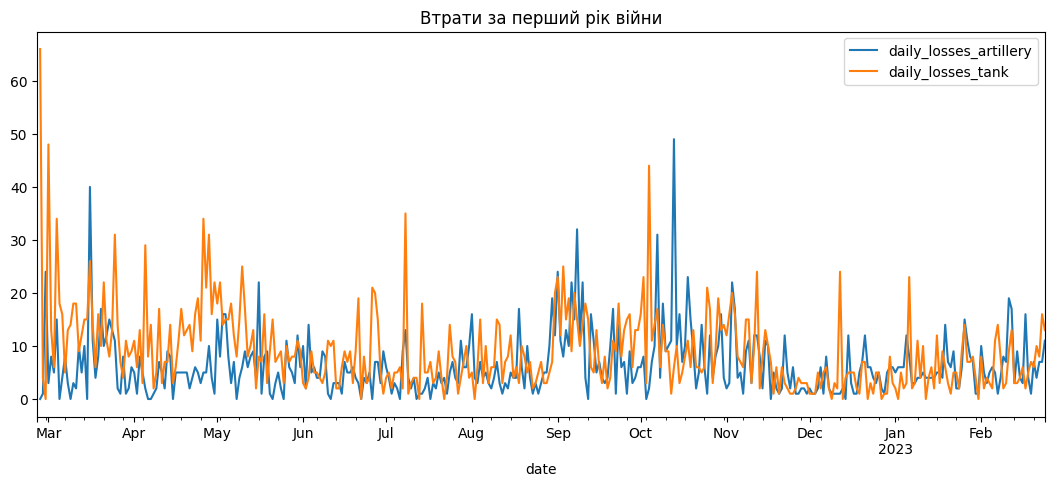

In [146]:
first_year = df.loc[(df['date'] >= '2022-02-25') & (df['date'] <= '2023-02-24'), ['date', 'daily_losses_artillery', 'daily_losses_tank']]
first_year.plot(x="date", y=['daily_losses_artillery', 'daily_losses_tank'], figsize=(13, 5), title="Втрати за перший рік війни")
first_year